In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy.optimize as opt
import matplotlib.pyplot as plt

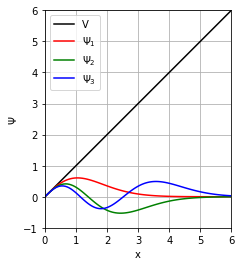

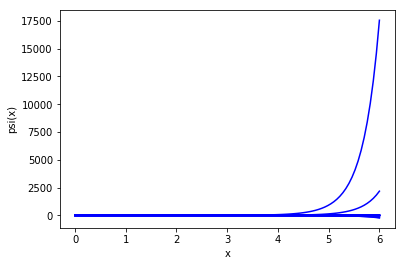

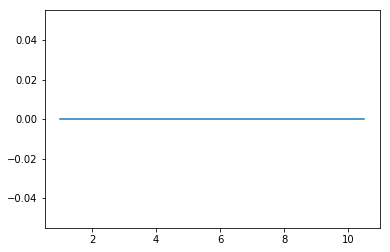

5.43260789271
2.19876780269
1.87977300409
1.85641415802
1.85576383754
1.85575707164
1.85575704058
1.85575704051
1.85575704051
1.85575704051
1.85575704051
1.85575704051
1.85575704051
1.85575704052
1.85575704051
1.85575704051
1.85575704051
1.85575704051
1.85575704051


'\nnum_l = 1\nroots = np.zeros(num_l)\nfor i in range(num_l):\n    roots[i] = bisect(getFcn(l*i/num_l), E0,E1)\n    \nplt.clf()\nplt.plot(np.linspace(0,l,num_l), roots)\nplt.show()\n'

In [3]:
E0 = 1 # constant energy
E1 = 10.5
iterations = 20

E = np.linspace(E0,E1,iterations)
y0 = [0.0, 1.0] # inital psi and psi'
l = 6
x = np.linspace(0, l, 101) # position

# time-independent schroedinger's equation with semi-infinite V
def tise(y, x, E):
    psi, u = y # u is d/dx*psi
    dydx = [u, 2*(x*psi - E*psi)]
    return dydx

"""
E = [1.85575704051,
3.24460764629,
4.38167125673,
5.38661375269,
6.30526300324,
7.16128271497,
7.96889161811,
8.7374714916,
9.47362183404,
10.1822068895]
"""

plt.plot(x, x, 'k', label='V')
s = odeint(tise, y0, x, args=(1.85575704051,))
plt.plot(x, s[:, 0], 'r', label='$\Psi_1$')
s = odeint(tise, y0, x, args=(3.24460764629,))
plt.plot(x, s[:, 0], 'g', label='$\Psi_2$')
s = odeint(tise, y0, x, args=(4.38167125673,))
plt.plot(x, s[:, 0], 'b', label='$\Psi_3$')
plt.legend()
#plt.plot(range(5))
plt.xlim(0, 6)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('x')
plt.ylabel(r'$\Psi$')
plt.show()
#plt.savefig("eignenfuns.pdf")

# numerical solution of TISE
psi_l = np.zeros(iterations)

for i in range(len(E)):
    sol = odeint(tise, y0, x, args=(E[i],))
    # plot psi over psi'
    plt.plot(x, sol[:, 0], 'b', label='$\Psi$')
    #plt.plot(x, sol[:, 1], 'g', label="$\dot{\Psi}$")
    #psi_l[i] = sol[-1,0]


#plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel(r'psi(x)')

plt.show()

plt.clf()
plt.plot(E,psi_l)
plt.show()


def getFcn(l):
    def fcn(E):
        x = np.linspace(0,l,101)
        psi = odeint(tise, y0, x, args=(E,))
        return psi[-1,0]
    return fcn

fcn = getFcn(10)

for l in range(1, 20):
    root = opt.newton(getFcn(l), E0)
    print(root)

range(5, 14)
    
"""
num_l = 1
roots = np.zeros(num_l)
for i in range(num_l):
    roots[i] = bisect(getFcn(l*i/num_l), E0,E1)
    
plt.clf()
plt.plot(np.linspace(0,l,num_l), roots)
plt.show()
"""